## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9564308	total: 53.6ms	remaining: 53.5s
1:	learn: 0.9246280	total: 54.5ms	remaining: 27.2s
2:	learn: 0.8939879	total: 55.5ms	remaining: 18.4s
3:	learn: 0.8639150	total: 55.9ms	remaining: 13.9s
4:	learn: 0.8393750	total: 56.3ms	remaining: 11.2s
5:	learn: 0.8116220	total: 56.8ms	remaining: 9.42s
6:	learn: 0.7893380	total: 57.3ms	remaining: 8.13s
7:	learn: 0.7665817	total: 57.8ms	remaining: 7.17s
8:	learn: 0.7410354	total: 58.3ms	remaining: 6.42s
9:	learn: 0.7179147	total: 58.6ms	remaining: 5.8s
10:	learn: 0.6954700	total: 58.9ms	remaining: 5.3s
11:	learn: 0.6726836	total: 59.2ms	remaining: 4.88s
12:	learn: 0.6516410	total: 62.2ms	remaining: 4.72s
13:	learn: 0.6300704	total: 63.2ms	remaining: 4.45s
14:	learn: 0.6120940	total: 64ms	remaining: 4.2s
15:	learn: 0.5921502	total: 65.2ms	remaining: 4.01s
16:	learn: 0.5738590	total: 65.8ms	remaining: 3.8s
17:	learn: 0.5581626	total: 66.1ms	remaining: 3.6s
18:	learn: 0.5410519	total: 66.4ms	remaining: 3.43s

76:	learn: 0.1209447	total: 117ms	remaining: 1.4s
77:	learn: 0.1181729	total: 117ms	remaining: 1.39s
78:	learn: 0.1163859	total: 118ms	remaining: 1.38s
79:	learn: 0.1141122	total: 120ms	remaining: 1.38s
80:	learn: 0.1115670	total: 121ms	remaining: 1.38s
81:	learn: 0.1100770	total: 124ms	remaining: 1.39s
82:	learn: 0.1082580	total: 129ms	remaining: 1.43s
83:	learn: 0.1062431	total: 133ms	remaining: 1.45s
84:	learn: 0.1041054	total: 133ms	remaining: 1.43s
85:	learn: 0.1019493	total: 145ms	remaining: 1.54s
86:	learn: 0.0999686	total: 145ms	remaining: 1.52s
87:	learn: 0.0978519	total: 146ms	remaining: 1.51s
88:	learn: 0.0957559	total: 146ms	remaining: 1.5s
89:	learn: 0.0937874	total: 147ms	remaining: 1.48s
90:	learn: 0.0924039	total: 157ms	remaining: 1.56s
91:	learn: 0.0907253	total: 157ms	remaining: 1.55s
92:	learn: 0.0891499	total: 157ms	remaining: 1.53s
93:	learn: 0.0881040	total: 158ms	remaining: 1.52s
94:	learn: 0.0867955	total: 160ms	remaining: 1.52s
95:	learn: 0.0855228	total: 161ms

127:	learn: 0.0577746	total: 228ms	remaining: 1.55s
128:	learn: 0.0574290	total: 235ms	remaining: 1.59s
129:	learn: 0.0568829	total: 236ms	remaining: 1.58s
130:	learn: 0.0564939	total: 238ms	remaining: 1.58s
131:	learn: 0.0559595	total: 263ms	remaining: 1.73s
132:	learn: 0.0556293	total: 266ms	remaining: 1.74s
133:	learn: 0.0551574	total: 268ms	remaining: 1.73s
134:	learn: 0.0546588	total: 268ms	remaining: 1.72s
135:	learn: 0.0543462	total: 269ms	remaining: 1.71s
136:	learn: 0.0538367	total: 270ms	remaining: 1.7s
137:	learn: 0.0535090	total: 270ms	remaining: 1.69s
138:	learn: 0.0530609	total: 274ms	remaining: 1.7s
139:	learn: 0.0525877	total: 275ms	remaining: 1.69s
140:	learn: 0.0522394	total: 276ms	remaining: 1.68s
141:	learn: 0.0518684	total: 277ms	remaining: 1.67s
142:	learn: 0.0516379	total: 277ms	remaining: 1.66s
143:	learn: 0.0514284	total: 278ms	remaining: 1.65s
144:	learn: 0.0512044	total: 278ms	remaining: 1.64s
145:	learn: 0.0509743	total: 280ms	remaining: 1.64s
146:	learn: 0.

174:	learn: 0.0448622	total: 390ms	remaining: 1.84s
175:	learn: 0.0447354	total: 394ms	remaining: 1.84s
176:	learn: 0.0446048	total: 397ms	remaining: 1.85s
177:	learn: 0.0444674	total: 398ms	remaining: 1.84s
178:	learn: 0.0442685	total: 399ms	remaining: 1.83s
179:	learn: 0.0441054	total: 402ms	remaining: 1.83s
180:	learn: 0.0439594	total: 405ms	remaining: 1.83s
181:	learn: 0.0438358	total: 406ms	remaining: 1.82s
182:	learn: 0.0436855	total: 407ms	remaining: 1.81s
183:	learn: 0.0434986	total: 407ms	remaining: 1.8s
184:	learn: 0.0433467	total: 408ms	remaining: 1.79s
185:	learn: 0.0432342	total: 409ms	remaining: 1.79s
186:	learn: 0.0431022	total: 409ms	remaining: 1.78s
187:	learn: 0.0430247	total: 410ms	remaining: 1.77s
188:	learn: 0.0429388	total: 410ms	remaining: 1.76s
189:	learn: 0.0428116	total: 411ms	remaining: 1.75s
190:	learn: 0.0426884	total: 415ms	remaining: 1.76s
191:	learn: 0.0425186	total: 419ms	remaining: 1.76s
192:	learn: 0.0423955	total: 420ms	remaining: 1.75s
193:	learn: 0

272:	learn: 0.0334067	total: 517ms	remaining: 1.38s
273:	learn: 0.0333303	total: 520ms	remaining: 1.38s
274:	learn: 0.0332931	total: 523ms	remaining: 1.38s
275:	learn: 0.0332388	total: 525ms	remaining: 1.38s
276:	learn: 0.0331701	total: 526ms	remaining: 1.37s
277:	learn: 0.0331309	total: 527ms	remaining: 1.37s
278:	learn: 0.0330674	total: 529ms	remaining: 1.37s
279:	learn: 0.0329621	total: 530ms	remaining: 1.36s
280:	learn: 0.0329126	total: 531ms	remaining: 1.36s
281:	learn: 0.0328396	total: 532ms	remaining: 1.35s
282:	learn: 0.0328151	total: 533ms	remaining: 1.35s
283:	learn: 0.0327558	total: 534ms	remaining: 1.34s
284:	learn: 0.0326640	total: 535ms	remaining: 1.34s
285:	learn: 0.0325485	total: 536ms	remaining: 1.34s
286:	learn: 0.0325132	total: 537ms	remaining: 1.33s
287:	learn: 0.0324330	total: 539ms	remaining: 1.33s
288:	learn: 0.0323687	total: 543ms	remaining: 1.33s
289:	learn: 0.0322420	total: 543ms	remaining: 1.33s
290:	learn: 0.0322232	total: 544ms	remaining: 1.33s
291:	learn: 

322:	learn: 0.0300977	total: 604ms	remaining: 1.26s
323:	learn: 0.0300448	total: 607ms	remaining: 1.27s
324:	learn: 0.0299773	total: 610ms	remaining: 1.27s
325:	learn: 0.0299326	total: 613ms	remaining: 1.27s
326:	learn: 0.0298743	total: 614ms	remaining: 1.26s
327:	learn: 0.0298514	total: 614ms	remaining: 1.26s
328:	learn: 0.0298078	total: 616ms	remaining: 1.25s
329:	learn: 0.0297594	total: 616ms	remaining: 1.25s
330:	learn: 0.0296807	total: 617ms	remaining: 1.25s
331:	learn: 0.0296333	total: 617ms	remaining: 1.24s
332:	learn: 0.0295702	total: 617ms	remaining: 1.24s
333:	learn: 0.0295102	total: 619ms	remaining: 1.23s
334:	learn: 0.0294633	total: 620ms	remaining: 1.23s
335:	learn: 0.0293582	total: 620ms	remaining: 1.23s
336:	learn: 0.0293347	total: 620ms	remaining: 1.22s
337:	learn: 0.0292937	total: 621ms	remaining: 1.22s
338:	learn: 0.0292664	total: 621ms	remaining: 1.21s
339:	learn: 0.0292099	total: 623ms	remaining: 1.21s
340:	learn: 0.0291558	total: 627ms	remaining: 1.21s
341:	learn: 

453:	learn: 0.0242475	total: 741ms	remaining: 891ms
454:	learn: 0.0241963	total: 741ms	remaining: 887ms
455:	learn: 0.0241538	total: 741ms	remaining: 884ms
456:	learn: 0.0241057	total: 742ms	remaining: 882ms
457:	learn: 0.0240598	total: 743ms	remaining: 879ms
458:	learn: 0.0240344	total: 744ms	remaining: 876ms
459:	learn: 0.0240128	total: 744ms	remaining: 874ms
460:	learn: 0.0239861	total: 745ms	remaining: 871ms
461:	learn: 0.0239552	total: 745ms	remaining: 868ms
462:	learn: 0.0238932	total: 746ms	remaining: 865ms
463:	learn: 0.0238560	total: 747ms	remaining: 863ms
464:	learn: 0.0238221	total: 748ms	remaining: 861ms
465:	learn: 0.0237869	total: 749ms	remaining: 858ms
466:	learn: 0.0237626	total: 750ms	remaining: 855ms
467:	learn: 0.0236886	total: 750ms	remaining: 853ms
468:	learn: 0.0236584	total: 751ms	remaining: 850ms
469:	learn: 0.0236342	total: 752ms	remaining: 848ms
470:	learn: 0.0235935	total: 753ms	remaining: 845ms
471:	learn: 0.0235638	total: 753ms	remaining: 843ms
472:	learn: 

637:	learn: 0.0191686	total: 887ms	remaining: 503ms
638:	learn: 0.0191534	total: 888ms	remaining: 502ms
639:	learn: 0.0191372	total: 890ms	remaining: 501ms
640:	learn: 0.0191269	total: 891ms	remaining: 499ms
641:	learn: 0.0191007	total: 891ms	remaining: 497ms
642:	learn: 0.0190790	total: 891ms	remaining: 495ms
643:	learn: 0.0190552	total: 894ms	remaining: 494ms
644:	learn: 0.0190331	total: 895ms	remaining: 493ms
645:	learn: 0.0190144	total: 896ms	remaining: 491ms
646:	learn: 0.0189911	total: 897ms	remaining: 489ms
647:	learn: 0.0189756	total: 897ms	remaining: 487ms
648:	learn: 0.0189646	total: 898ms	remaining: 486ms
649:	learn: 0.0189504	total: 898ms	remaining: 484ms
650:	learn: 0.0189344	total: 899ms	remaining: 482ms
651:	learn: 0.0189192	total: 900ms	remaining: 480ms
652:	learn: 0.0189054	total: 901ms	remaining: 479ms
653:	learn: 0.0188849	total: 902ms	remaining: 477ms
654:	learn: 0.0188672	total: 903ms	remaining: 475ms
655:	learn: 0.0188499	total: 903ms	remaining: 474ms
656:	learn: 

706:	learn: 0.0178906	total: 1.09s	remaining: 451ms
707:	learn: 0.0178749	total: 1.09s	remaining: 449ms
708:	learn: 0.0178613	total: 1.1s	remaining: 453ms
709:	learn: 0.0178344	total: 1.1s	remaining: 451ms
710:	learn: 0.0178142	total: 1.11s	remaining: 450ms
711:	learn: 0.0177874	total: 1.11s	remaining: 448ms
712:	learn: 0.0177721	total: 1.11s	remaining: 446ms
713:	learn: 0.0177476	total: 1.11s	remaining: 444ms
714:	learn: 0.0177320	total: 1.11s	remaining: 442ms
715:	learn: 0.0176889	total: 1.11s	remaining: 441ms
716:	learn: 0.0176728	total: 1.11s	remaining: 439ms
717:	learn: 0.0176563	total: 1.11s	remaining: 437ms
718:	learn: 0.0176484	total: 1.11s	remaining: 436ms
719:	learn: 0.0176175	total: 1.11s	remaining: 434ms
720:	learn: 0.0175985	total: 1.11s	remaining: 432ms
721:	learn: 0.0175664	total: 1.12s	remaining: 430ms
722:	learn: 0.0175544	total: 1.12s	remaining: 428ms
723:	learn: 0.0175477	total: 1.12s	remaining: 426ms
724:	learn: 0.0175294	total: 1.12s	remaining: 424ms
725:	learn: 0.

771:	learn: 0.0168014	total: 1.19s	remaining: 351ms
772:	learn: 0.0167855	total: 1.19s	remaining: 350ms
773:	learn: 0.0167822	total: 1.19s	remaining: 349ms
774:	learn: 0.0167598	total: 1.2s	remaining: 347ms
775:	learn: 0.0167476	total: 1.2s	remaining: 346ms
776:	learn: 0.0167335	total: 1.2s	remaining: 345ms
777:	learn: 0.0167085	total: 1.2s	remaining: 343ms
778:	learn: 0.0166922	total: 1.2s	remaining: 341ms
779:	learn: 0.0166720	total: 1.2s	remaining: 339ms
780:	learn: 0.0166630	total: 1.2s	remaining: 338ms
781:	learn: 0.0166501	total: 1.21s	remaining: 336ms
782:	learn: 0.0166359	total: 1.21s	remaining: 335ms
783:	learn: 0.0166305	total: 1.21s	remaining: 333ms
784:	learn: 0.0166145	total: 1.21s	remaining: 331ms
785:	learn: 0.0165962	total: 1.21s	remaining: 330ms
786:	learn: 0.0165795	total: 1.21s	remaining: 328ms
787:	learn: 0.0165677	total: 1.21s	remaining: 326ms
788:	learn: 0.0165478	total: 1.21s	remaining: 325ms
789:	learn: 0.0165330	total: 1.22s	remaining: 323ms
790:	learn: 0.01652

923:	learn: 0.0148070	total: 1.33s	remaining: 109ms
924:	learn: 0.0147928	total: 1.33s	remaining: 108ms
925:	learn: 0.0147768	total: 1.33s	remaining: 106ms
926:	learn: 0.0147677	total: 1.33s	remaining: 105ms
927:	learn: 0.0147563	total: 1.33s	remaining: 103ms
928:	learn: 0.0147469	total: 1.33s	remaining: 102ms
929:	learn: 0.0147385	total: 1.33s	remaining: 100ms
930:	learn: 0.0147296	total: 1.33s	remaining: 98.9ms
931:	learn: 0.0147220	total: 1.33s	remaining: 97.4ms
932:	learn: 0.0147143	total: 1.34s	remaining: 96ms
933:	learn: 0.0146957	total: 1.34s	remaining: 94.6ms
934:	learn: 0.0146755	total: 1.34s	remaining: 93.1ms
935:	learn: 0.0146677	total: 1.34s	remaining: 91.6ms
936:	learn: 0.0146627	total: 1.34s	remaining: 90ms
937:	learn: 0.0146503	total: 1.34s	remaining: 88.5ms
938:	learn: 0.0146408	total: 1.34s	remaining: 87.1ms
939:	learn: 0.0146244	total: 1.34s	remaining: 85.6ms
940:	learn: 0.0146161	total: 1.34s	remaining: 84.1ms
941:	learn: 0.0145954	total: 1.34s	remaining: 82.7ms
942:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02068558747317181
ABC Pre-generator MAE 0.7402569554871185


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

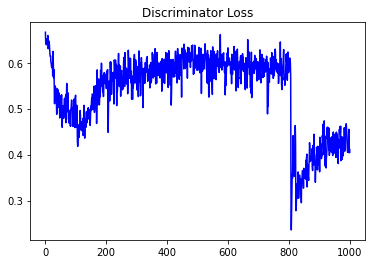

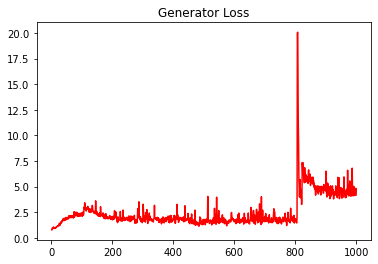

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.1983957151696086


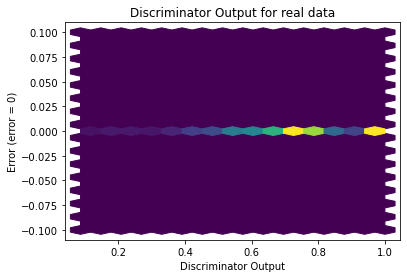

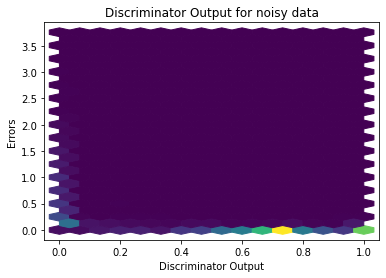

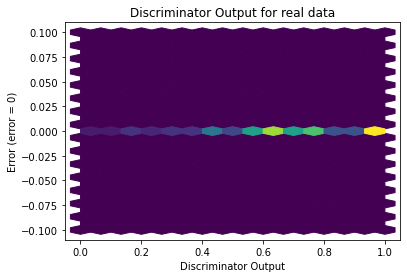

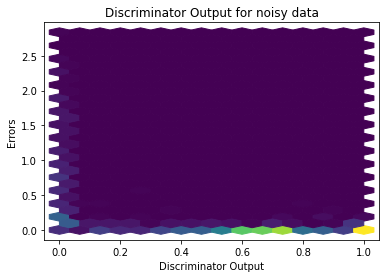

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


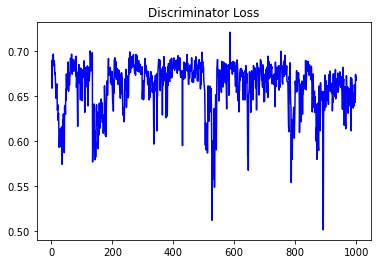

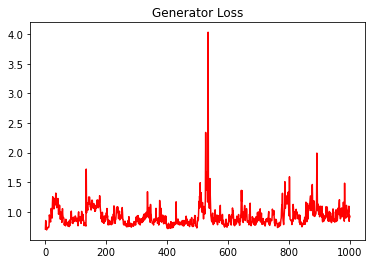

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.06124024449351739


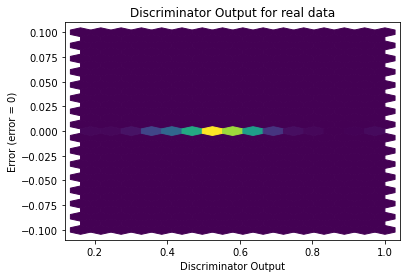

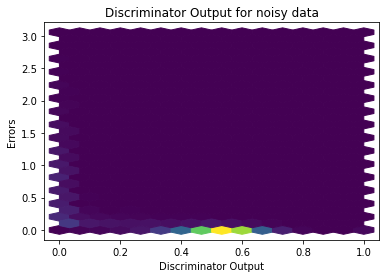

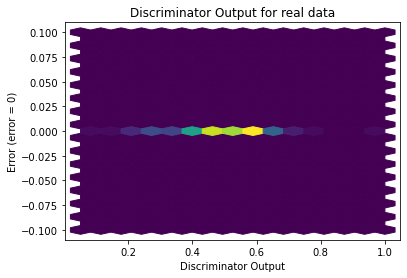

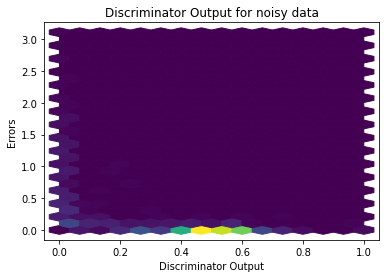

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


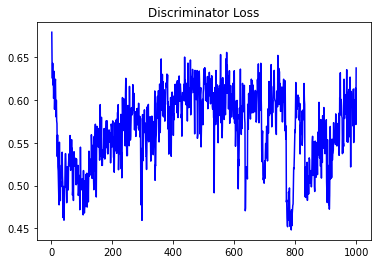

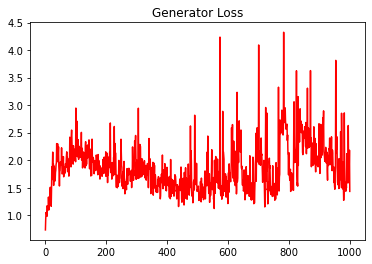

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08088510326170302


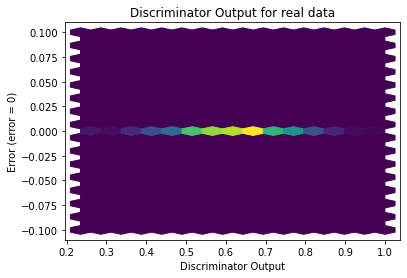

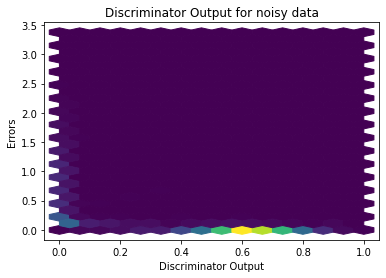

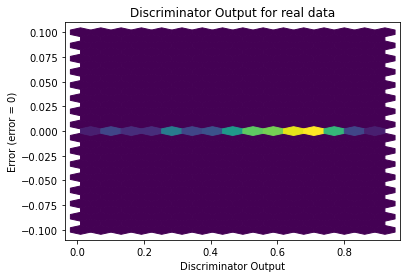

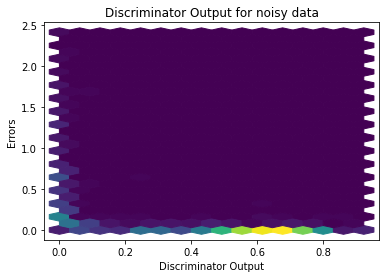

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9160]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], requires_grad=True)
